In [38]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
filepath="/content/drive/MyDrive/data/suretrust project"

In [50]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers

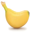

In [41]:
img=Image.open("/content/drive/MyDrive/data/suretrust project/fresh_banana/Screen Shot 2018-06-12 at 10.00.49 PM.png")
img=img.resize((32,32))
img

In [42]:
data=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/data/suretrust project",
    image_size=(32,32),
    color_mode="rgb",
    batch_size=3050)

Found 3050 files belonging to 2 classes.


In [43]:
for feature,label in data:
    print(feature.shape,label.shape)
    break

(3050, 32, 32, 3) (3050,)


In [60]:
model=tf.keras.Sequential([
    layers.Conv2D(16,3,input_shape=(32,32,3),activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Conv2D(48,3,activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(16,"relu"),
    layers.Dense(2,"sigmoid")

    ])

In [61]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 48)          13872     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 2, 2, 48)        

In [62]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [63]:
for images,labels in data:
    features=tf.divide(feature,255)
    labels=tf.one_hot(label,2)
    record=model.fit(features,labels,batch_size=10,epochs=50)
    break

Epoch 1/50
305/305 [==============================] - 5s 13ms/step - loss: 0.1410 - accuracy: 0.9413
Epoch 2/50
305/305 [==============================] - 4s 13ms/step - loss: 0.0492 - accuracy: 0.9820
Epoch 3/50
305/305 [==============================] - 4s 13ms/step - loss: 0.0336 - accuracy: 0.9882
Epoch 4/50
305/305 [==============================] - 4s 13ms/step - loss: 0.0308 - accuracy: 0.9895
Epoch 5/50
305/305 [==============================] - 4s 14ms/step - loss: 0.0222 - accuracy: 0.9921
Epoch 6/50
305/305 [==============================] - 4s 14ms/step - loss: 0.0135 - accuracy: 0.9951
Epoch 7/50
305/305 [==============================] - 4s 14ms/step - loss: 0.0060 - accuracy: 0.9974
Epoch 8/50
305/305 [==============================] - 4s 13ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 9/50
305/305 [==============================] - 4s 14ms/step - loss: 3.7868e-04 - accuracy: 1.0000
Epoch 10/50
305/305 [==============================] - 4s 14ms/step - loss: 2.9343e-04 

In [48]:
model=model.save("fresh_banana.h5",save_format="h5")

In [51]:
model=tf.keras.models.load_model("fresh_banana.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 48)          13872     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 48)        